# **Regressão Linear: Predição de Custos de Plano de Saúde**

**O Problema**

Despesas médicas são uma das principais despesas no dia a dia da vida humana. Muitos fatores contribuem para a evolução destes gastos, estilos de vidas e parâmetros físicos podem trazer doenças e enfermidades que causam esses aumentos em planos de saúde. Além disso, alguns estudos indicam que, os principais fatores que contribuem para maiores gastos em cuidados médicos pessoais incluem tabagismo, envelhecimento e IMC.

Faremos então, uma análise de dados de planos de saúde dos EUA. Os dados são secundários, e podem ser encontrados aqui. Contêm 1338 linhas e 6 colunas que trazem as seguintes informações: **idade, sexo, crianças, fumante, região e total gasto com o seguro**. O objetivo desta análise é determinar quais os fatores e efeitos elevam o custo de seguro e criar um modelo de **Regressão Linear Múltipla** que possa prever o custo do seguro de saúde com base nos fatores que o influenciam.

Então, vamos preparar um sumário do que veremos nesta análise.

1.   O que é Regressão?
3.   Análise Exploratória dos Dados
4.   Modelo de Regressão Linear
5.   Perfomance do Modelo




## **1. Regressão Linear**

Um dos primeiros modelos estatísticos+ e de Machine Learning que temos contato ao entrar nesse universo de análise de dados é o de **Regressão Linear**.

Regressão Linear é uma equação para se estimar um alvo (variável y ou dependente), dados os valores de outras variáveis (variáveis x ou independentes). Um algoritmo simples, mas que usado com os parâmetros corretos é capaz de oferecer uma grande capacidade preditiva somente com a relação das suas variáveis.

Um exemplo, suponhamos que uma escola avalie a nota de seus alunos por horas dedicadas ao estudo, com esses dados em mãos, traçam uma relação entre as variáveis, onde a nota seria a variável alvo (y) e as horas de estudo a variável independentes (x).


![texto alternativo](https://eleijonmarck.dev/8a25f3ea757821016127cb80936c939f/linear_regression_error.gif)

Basicamente, o que o algoritmo de regressão linear faz é ajustar várias linhas nos pontos de dados e retornar a linha que resulta no menor erro. Tudo isso em uma equação matemática.

**O modelo de regressão linear**

Para representar a relação entre uma variável dependente (y) e uma variável independente (x), usamos o modelo:

$$y = a + bx$$

Onde: 

**Y** = Alvo 

**a** = Intercepto

**b** = Inclinação da reta

**x** = variável independente


Em casos em que existam mais de duas variáveis, este conceito pode ser estendido, temos assim a **regressão linear múltipla**. Por exemplo, considere um cenário em que você deve prever o preço da casa com base em sua área, número de quartos, renda média das pessoas na área, idade da casa e assim por diante. Nesse caso, a variável dependente (variável de destino) depende de várias variáveis independentes.


![texto alternativo](https://miro.medium.com/max/616/1*LsmGjBMwUe-CieGxFYvXHA.png)

# **2. Análise Exploratória dos dados**

Com a regressão linear explicada, e sem mais delongas, vamos colocar a mão no código!

Primeiramente, vamos importar as bibliotecas necessárias e logo após, vamos fazer a análise exploratória dos dados, para entendermos melhor com o que estamos trabalhando.

In [1]:
#Importando as bibliotecas
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
#Importando os dados
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Linear Regression/insurance.csv')

#Visualizando tabela dos dados
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#Breve descrição dos dados
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Repararam que na tabela de descrição não tem todas as variáveis? 

Então, se olharmos um pouco mais acima para a tabela com os dados, vemos algumas colunas que estão com dados não númericos. E como vamos passar essas informações para nosso algoritmo?

Para isso a biblioteca `sklearn` possui uma *feature* de pré processamento chamada `LabelEncoder` que classifica essas informações em númerica. Vamos aplica-lá as colunas de Sexo, Fumante e Região.

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#sex
le.fit(df.sex) 
df.sex = le.transform(df.sex)

# smoker
le.fit(df.smoker) 
df.smoker = le.transform(df.smoker)

#region
le.fit(df.region) 
df.region = le.transform(df.region)

In [6]:
#Vamos conferir como ficou o tipo de cada coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


Pronto, dados normalizados, vamos começar a análise exploratória.

A primeira coisa que vamos verificar é a **correlação** entre as váriaveis.

O que a correlação procura entender é como uma variável se comporta em um cenário onde outra está variando, visando identificar se existe alguma relação entre a variabilidade de ambas. Embora não implique em causalidade, o coeficiente de correlação exprime em números essa relação, ou seja, quantifica a relação entre as variáveis.

In [7]:
#Tabela de correlação
corr = df.corr()
corr

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


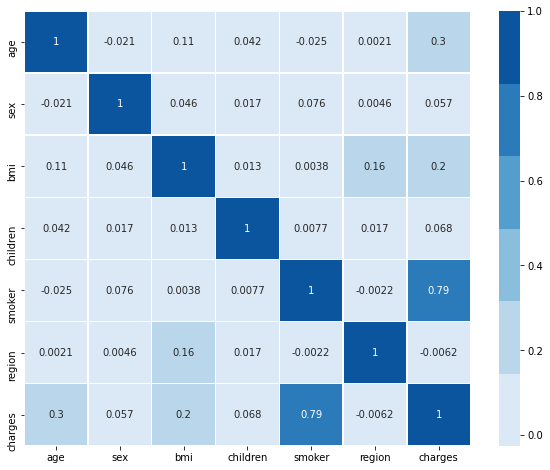

In [8]:
#Vamos ver a correlação graficamente
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, cmap=sns.color_palette("Blues"), linewidths=.5, annot=True);

Fumantes tem uma forte correlação com os gastos em saúde.Surpreende a baixa correlação com o índice de massa corporal.

Vamos olhar como está a distribuição dos gastos e depois vamos analisar mais a fundo a variável fumante.

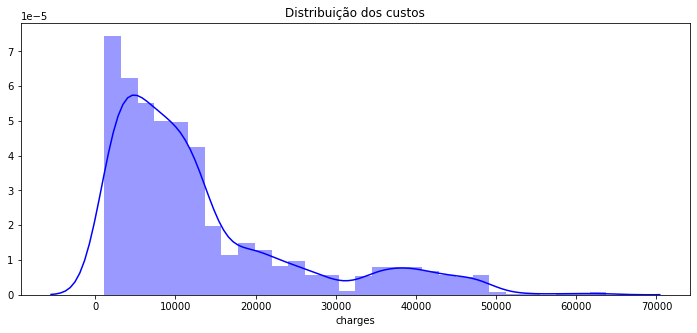

In [9]:
#Distribuição dos custos
plt.figure(figsize=(12,5))
plt.title("Distribuição dos custos")
ax = sns.distplot(df["charges"], color = 'b')

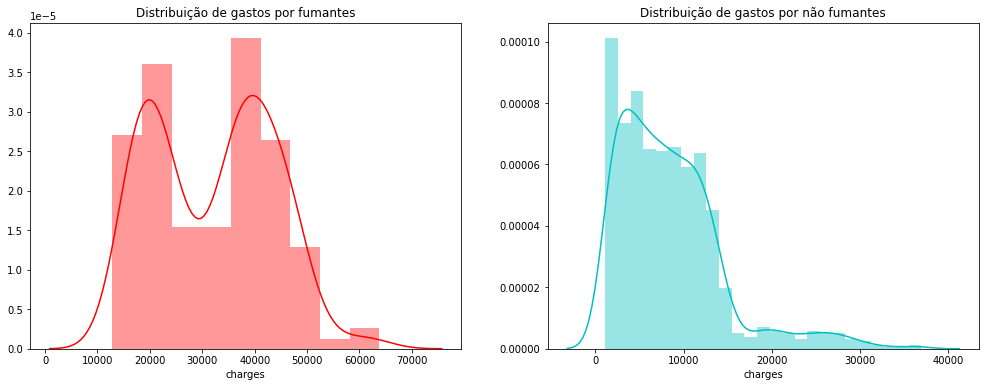

In [10]:
#Distruição de Gastos por Fumantes e não fumantes
fig= plt.figure(figsize=(17,6))

ax=fig.add_subplot(121)
sns.distplot(df[(df.smoker == 1)]["charges"],color='r',ax=ax)
ax.set_title('Distribuição de gastos por fumantes');

ax=fig.add_subplot(122)
sns.distplot(df[(df.smoker == 0)]['charges'],color='c',ax=ax)
ax.set_title('Distribuição de gastos por não fumantes');

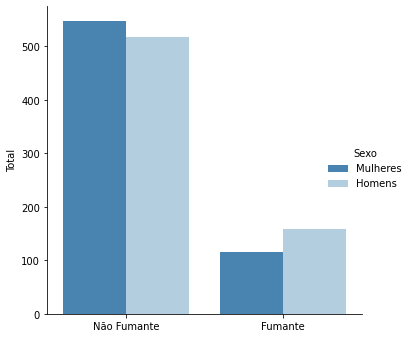

In [11]:
#Total de Fumantes e não fumantes por sexo
g = sns.catplot(x="smoker", kind="count",hue = 'sex', palette="Blues_r", data=df,legend_out= True)

# Eixos
(g.set_axis_labels("", "Total")
  .set_xticklabels(["Não Fumante", "Fumante"])
  )

# Legenda
g._legend.set_title('Sexo')
new_labels = ['Mulheres', 'Homens']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

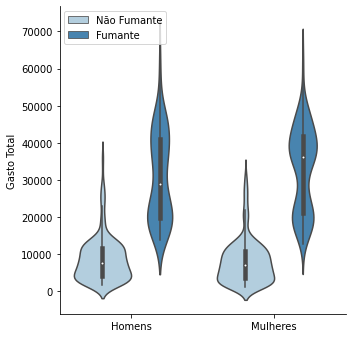

In [12]:
#Distribuição de gastos por fumante e não fumante por sexo
g= sns.catplot(x="sex", y="charges", hue="smoker",
            kind="violin", data=df, palette = 'Blues', legend_out= False, ax=ax);

# Eixos
(g.set_axis_labels("", "Gasto Total")
  .set_xticklabels(["Homens", "Mulheres"])
  )

# Legenda
leg = g.axes.flat[0].get_legend()
new_title = ''
leg.set_title(new_title)
new_labels = ["Não Fumante", "Fumante"]
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
g._legend.set_bbox_to_anchor((.39,1))

De fato, os gráficos nos mostram que fumantes possuem uma forte tendencia a terem mais gastos com saúde.

Vamos prosseguir visualizando a idade dos contratantes.

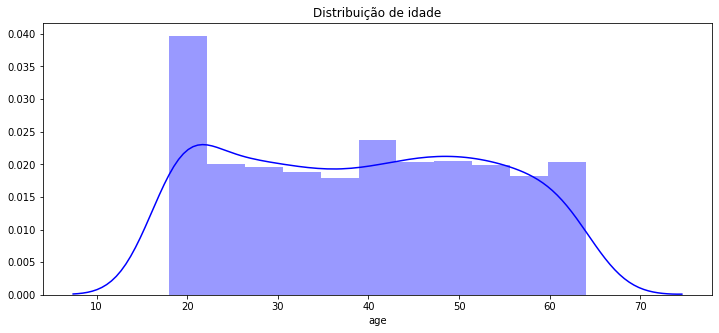

In [13]:
plt.figure(figsize=(12,5))
plt.title("Distribuição de idade")
ax = sns.distplot(df["age"], color = 'b')

A maioria dos pacientes do nosso dataset possuem menos de 20 anos, sendo o menor 18 anos e o maior com 64 anos. 

Vamos ver como os custos estão distribuidos entre a idade e os fumantes.

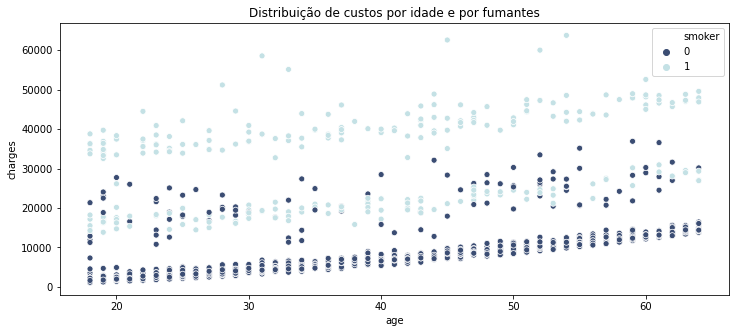

In [14]:
plt.figure(figsize=(12,5))
plt.title("Distribuição de custos por idade e por fumantes")

#Distribuição de gastos por fumante e não fumante por sexo
sns.scatterplot(x=df.age,y=df.charges, hue= df.smoker, sizes=(12,5),  palette="ch:r=-.2,d=.3_r");

Acho que esse gráfico já deixa bem claro como os fumantes possuem custos maiores com sua saúde.

Ok, já vimos que fumar causa grandes problemas a nossa saúde e também ao nosso bolso, mas vamos analisar as demais variáveis.



Outra váriavel que logo pensamos que pode influenciar os custos hospitalares é de índice de massa corporal (IMC) ou *Body mass index (BMI)* como se encontra em nossos dados. Vamos então olhar mais a fundo para eles e ver, de fato, seu impacto nos custos.

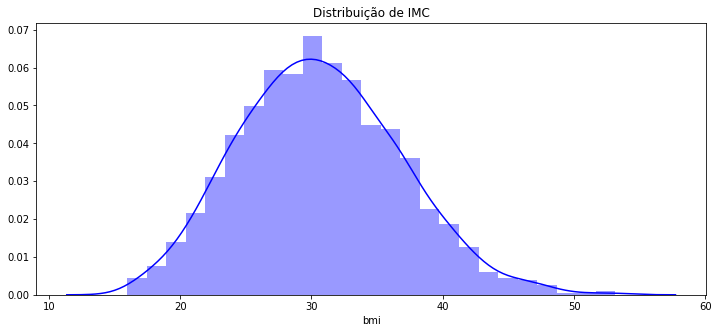

In [15]:
plt.figure(figsize=(12,5))
plt.title("Distribuição de IMC")
ax = sns.distplot(df["bmi"], color = 'b')

A distruibuição de IMC está concentrado na casa dos 30. ACredito que para uma melhor compreensão desta informação devemos relembrar da tabela IMC. Por isso estou a disponibilizando abaixo:

![texto alternativo](https://uploaddeimagens.com.br/images/002/789/928/full/Design_sem_nome.png?1595534687)

Sim, grande maioria dos pacientes do nosso dataset estão ou obesos ou super obesos!

Agora uma para rápida no estudo para verificarmos nosso IMC! Cuide de sua saúde!



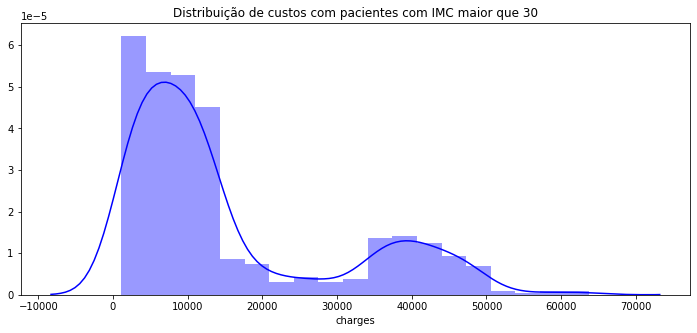

In [16]:
plt.figure(figsize=(12,5))
plt.title("Distribuição de custos com pacientes com IMC maior que 30")
ax = sns.distplot(df[(df.bmi >= 30)]['charges'], color = 'b')

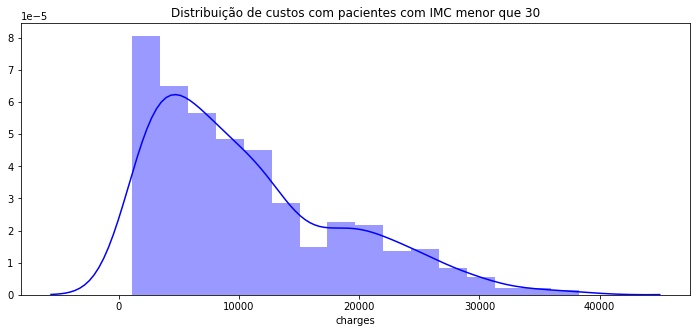

In [17]:
plt.figure(figsize=(12,5))
plt.title("Distribuição de custos com pacientes com IMC menor que 30")
ax = sns.distplot(df[(df.bmi < 30)]['charges'], color = 'b')

Como esperado, o custo para pessoas com IMC maior que 30 é maior!

Agora vamos ver como os filhos entram nessa análise.

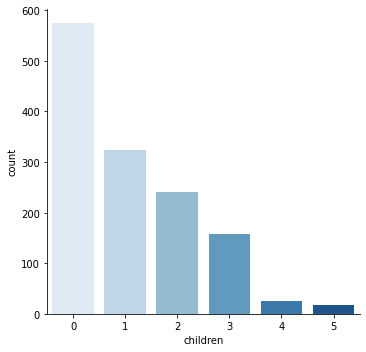

In [18]:
sns.catplot(x="children", kind="count", palette="Blues", data=df, size = 5);

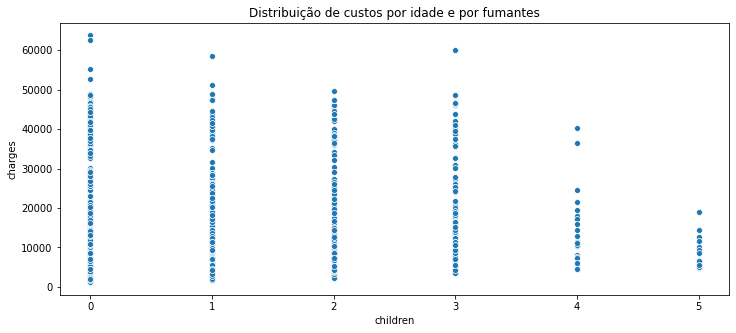

In [19]:
#Distruição de Gastos por Fumantes e não fumantes
plt.figure(figsize=(12,5))
plt.title("Distribuição de custos por idade e por fumantes")

#Distribuição de gastos por fumante e não fumante por sexo
sns.scatterplot(x=df.children,y=df.charges, sizes=(12,5),  palette="ch:r=-.2,d=.3_r");


Não fica claro nenhum padrão de custo sobre a quantidade de filhos.

Poderiamos aprofundar ainda mais a análise, combinar as váriaveis e aplicar outros conceitos, mas como o objetivo principal deste projeto é apresentar um modelo de regressão linear, vamos parar por aqui.

Vamos agora colocar nosso modelo para rodar!

# **3. Modelo de Regressão Linear**

Antes de rodar nosso modelo e verificar quais seus resultados, precisamos preparar os dados para ele.

Para isso precisamos separar os valores gastos por cada paciente, já que queremos predizer esses valores não podemos que o modelo saiba quais são!

Vamos criar dois datasets, um com todas as váriaveis, exceto a de gastos, e outro somente com os gastos.

In [20]:
#Separando os dados
x = df.drop(['charges'], axis = 1)
y = df.charges

Agora usaremos uma função da biblioteca `scikit-learn` que é a `train_test_split`, esta função separa nossos dados entre treino e teste de forma aleatória, sendo treinado com uma parte dos dados e testados com a outra.

Usaremos 80% dos dados para treino e 20% para teste, esta divisão é feita através da feature `test_size=0.2`

In [21]:
#Separando os dados de Treino e Teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [22]:
#Criando um Objeto de Regressão Linear
lr = LinearRegression()

In [23]:
#Treinando o Modelo
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
#Verificando o resultado
r_sq = lr.score(x, y)
print('Coeficiente de Determinação (R²):', r_sq)

Coeficiente de Determinação (R²): 0.7503652768429028


É um belo resultado se levar em consideração que não foi feita nenhuma alteração nos parametros dos dados.

Vamos fazer agora uma análise da regressão.



# **4.Perfomance do Modelo**

Nesta etapa, que será a última, avaliaremos o modelo de regressão e explicar os conceitos de avaliação.

Primeiro, vamos olhar o Intercepto e os Coeficientes da Regressãso.

In [37]:
print('Intercepto:', lr.intercept_)

Intercepto: -11821.525228002496


In [38]:
coeff_df = pd.DataFrame(lr.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
age,250.763239
sex,-106.774545
bmi,339.357134
children,438.434642
smoker,23394.691029
region,-306.542135


O Intercepto representa o valor de B0 da equaçaõ da regressão linear. O valor de -11821.52 é a previsão do modelo quando o valor de X é zero.

O Coeficiente, neste caso, os coeficientes representam os "pesos" das váriaveis nos modelos, neste caso, na equação os identificamos como os b1, b2, b3...bn. O siginificado de cada valor é previsão da adição de cada valor dos coeficientes quando o valor de x é aumentado em um. Exemplo, Quando X aumenta em 1 é adicionado o valor de 250.76 no coeficiente da idade sobre o valor a ser previsto.

Com as informações dos "pesos" da sua regressão você pode avaliar quais váriaveis afetam o seu modelo, podendo assim aumentar sua eficácia. Outra forma de verificar isso é através o teste de p-valor.

 **Olhando para os Erros**

Uma forma de saber a perfomance da Regressão Linear é olharmos para nossos erros! Pois é errando que se aprende.

Para isso a biblioteca `sklearn` nos oferece uma função muito útil que resultado na impressão das principais métricas: MAE, MSE e RMSE. Vamos olhar os valores dessas métricas aplicadas ao modelo e depois discutiremos mais.

**Mean Absolute Error (MAE)** é a média do valor absoluto dos erros. 

**Erro Quadrático Médio (MSE)** é a média dos erros quadráticos

**Erro médio quadrático da raiz (RMSE)** é a raiz quadrada da média dos erros quadráticos

In [39]:
y_pred = lr.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 3943.410151219757
MSE: 31937211.865719117
RMSE: 5651.301785050867




Com o MAE podemos ver que nosso algoritmo erra  o custo hospitalar em 3943.41 doláres.

O RMSE têm o benefício em penalizar os erros de maior magnitude. Esta métrica pode não descrever sozinha o erro médio. Mas a diferença das métricas pode auxiliar no diagnóstico de predições muito ruins ou outliers. Se o RMSE ficar muito maior que MAE então esta suposição deve ser verificada. É o que acontece com o modelo :(

Neste caso teriamos que avaliar quais váriaveis penalizam nosso nmodelo, exclui-lás ou transforma-lás em combinação com outras váriaveis. Além de verificar se há Outliers ou se possuimos poucos dados para o modelo.




# **5. Conclusão**

É isto! Chegamos ao fim do tutorial de regressão linear no python com a biblioteca Sklearn. Explicamos conceitos e colocamos em pratica um modelo para prever os custos com plano de saúde. Obtivemos bons resultados, mas para colocar este modelo em prática, precisamos realizar diversos ajustes nele, além é claro de melhores dados de entrada, mas não era a acuracia do modelo que estava em foco, e sim, a apresentação desse simples modelo que pode ser um grande aliado na análise de dados. 

Precisamos da regressão para responder se e como um fenômeno influencia o outro ou como várias variáveis ​​estão relacionadas. A regressão também é útil quando você deseja prever uma resposta usando um novo conjunto de preditores. Por exemplo, você pode tentar prever o consumo de eletricidade de uma família pela próxima hora, considerando a temperatura externa, a hora do dia e o número de residentes nessa família.

A regressão é usada em muitos campos diferentes: economia, ciência da computação, ciências sociais e assim por diante. Sua importância aumenta todos os dias com a disponibilidade de grandes quantidades de dados e o aumento da conscientização sobre o valor prático dos dados.

Em Breve mostrarei outros modelos de Regressão e também como podemos melhorar os parâmetros dos modelos.

